In [1]:
import pandas as pd
import numpy as np
import os
import h5py
from copy import deepcopy
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
import seaborn as sns

from utils_plot import *

cm = 1/2.54 
h=5.8*1.1
w=6*1.1

resp_res_path = '/cluster/work/grlab/clinical/hirid2/research/event_based_analysis/resp/'
renal_res_path = '/cluster/work/grlab/clinical/hirid2/research/kdigo_analysis/'
resp_fig_path = '../Figures_Resp'
renal_fig_path = 'paper_figures_renal'

In [2]:
# early warning system configuration
renal_ews_configs = dict()
renal_ews_configs.update(pred_win=2880)
renal_ews_configs.update(min_event_gap=0)
renal_ews_configs.update(t_silence=480)
renal_ews_configs.update(t_buffer=0)
renal_ews_configs.update(t_reset=720)

splits = ['random_%d'%i for i in np.arange(1,6)]

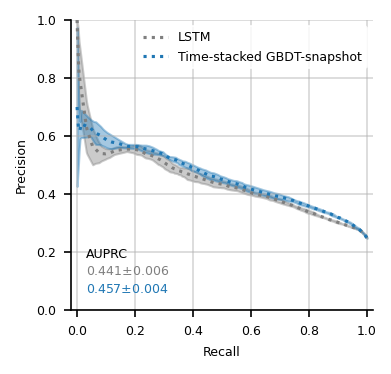

In [3]:
# early warning system configuration
curves = dict()
curves.update({"LSTM": dict(res_path=os.path.join(renal_res_path, 'var28_simple_features_extval_retrain_lstm_test_FromZero'),
                                             color='C7',
                                             linestyle=':',
                                             random_classifier=False, 
                                             splits=splits)})

curves.update({"Time-stacked GBDT-snapshot": dict(res_path=os.path.join(renal_res_path, 'var28_simple_features_separate_combined_calibrated_extval_retrain_lgbm_test_FromZero'),
                                             color='C0',
                                             linestyle=':',
                                             random_classifier=False,
                                             splits=splits)})


for k in curves.keys():
    curves[k].update(dict(**renal_ews_configs))
    
plt.figure(figsize=(w*cm, h*cm))
plot_event_based_prc(curves, fixed_rec=0.8)
plt.savefig(os.path.join(renal_fig_path,'mimic_gbm_lstm_uncalibrated'))
plt.show()  